# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension,
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.559223e+01     1.309871e+01
 * time: 0.0017368793487548828
     1     3.152081e+01     8.829013e+00
 * time: 0.006552934646606445
     2     2.735305e+01     7.452575e+00
 * time: 0.04242587089538574
     3     2.107943e+01     1.758001e+00
 * time: 0.04751086235046387
     4     1.967083e+01     1.427810e+00
 * time: 0.05242800712585449
     5     1.896606e+01     1.780612e+00
 * time: 0.056915998458862305
     6     1.864579e+01     1.514526e+00
 * time: 0.06143498420715332
     7     1.832550e+01     8.024999e-01
 * time: 0.06607985496520996
     8     1.817215e+01     6.364152e-01
 * time: 0.07070398330688477
     9     1.804874e+01     6.974595e-01
 * time: 0.07557988166809082
    10     1.794109e+01     6.558180e-01
 * time: 0.08027791976928711
    11     1.784101e+01     4.727654e-01
 * time: 0.08481502532958984
    12     1.778979e+01     4.701247e-01
 * time: 0.08954405784606934
    13     1.775443e+01     8.092419e-01
 * t

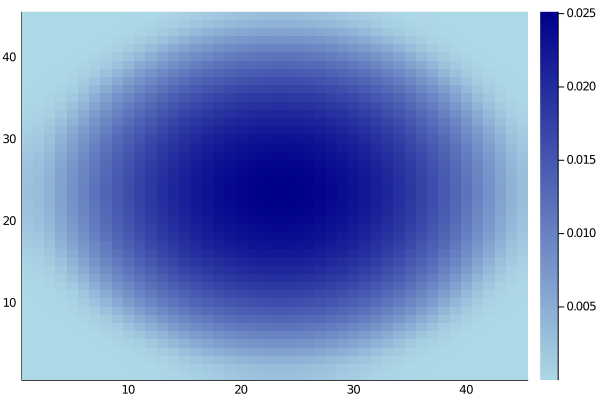

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)